# Notes
*  I may have been using sklearn's confusion matrix wrong: "Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.manifold import MDS

plt.rcParams['font.family']='serif'

In [3]:
cancer = load_breast_cancer()

X = cancer.data
Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.75)

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#cancer_df['outcome'] = Y

cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Cost-Sensitive Resampling
* Undersample the negatives to give positives more weight
* Not sure if this will help with KNN

## Cost-Sensitive Algorithms
* "Given that most machine learning algorithms are trained to minimize error, cost for misclassification is added to the error or used to weigh the error during the training process."
* This approach can be applied to the SVC, DecisionTreeClassifier, LogisticRegression, and RidgeClassifier in sklearn with the ```class_weight``` argument. 

### Feature Importance 

In [4]:
_, p_values = f_classif(X=cancer_df, y=Y)

scores = -np.log10(p_values)

scores /= np.max(scores)

sigma_mult = 5
cutoff_score = np.mean(scores)+sigma_mult*np.std(scores)

cutoff_mask = np.where(scores>np.mean(scores)+5*np.std(scores))[0]

No handles with labels found to put in legend.


[Text(0.5, 0, 'Feature Number'),
 Text(0, 0.5, 'Score $(-\\log_{10}\\mathrm{p})$'),
 Text(0.5, 1.0, 'Univariate Selection Scores')]

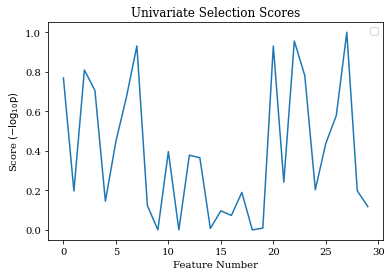

In [5]:
fig, ax = plt.subplots()

x = np.arange(0, len(scores), 1)

ax.plot(x, scores)

#ax.axhline(cutoff_score, color='steelblue', label=r'$\mu+5\sigma$')

ax.legend()
ax.set(xlabel='Feature Number', 
       ylabel='Score '+r'$(-\log_{10}\mathrm{p})$', 
       title='Univariate Selection Scores')

### MDS 

In [66]:
mds = MDS(random_state=1, n_components=3)

X_mds = mds.fit_transform(cancer_df)

new_df = pd.DataFrame(X_mds)

X_train, X_test, y_train, y_test = train_test_split(new_df, Y,test_size=0.15)

In [51]:
## LOW DIM (dim=1) for visualization ... doesn't make sense
low_dim_mds = MDS(random_state=2, n_components=1)
x_one_d = low_dim_mds.fit_transform(cancer_df)

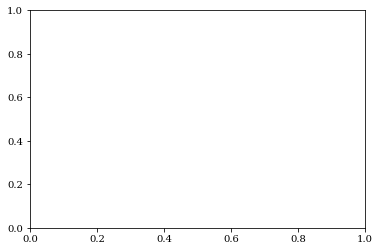

In [56]:
zero_mask = np.where(Y==0)
one_mask = np.where(Y==1)

fig, ax = plt.subplots()

#ax.scatter(x_one_d[zero_mask], Y[zero_mask], color='black', label='0')
#ax.scatter(x_one_d[one_mask], Y[one_mask], color='red', label='1')

plt.show() # doesn't make sense

### Logistic Regression

In [67]:
no_weights = logreg() 
no_weights.fit(X_train,y_train)
unweighted_acc = no_weights.score(X_test, y_test)
unweighted_acc 

0.9418604651162791

In [68]:
weighted = logreg(class_weight={0:1, 1:10}) 
weighted.fit(X_train,y_train)
weighted_acc = weighted.score(X_test,y_test)
weighted_acc

0.9186046511627907

In [69]:
no_weights_predictions = no_weights.predict(X_test)
weighted_predictions = weighted.predict(X_test)

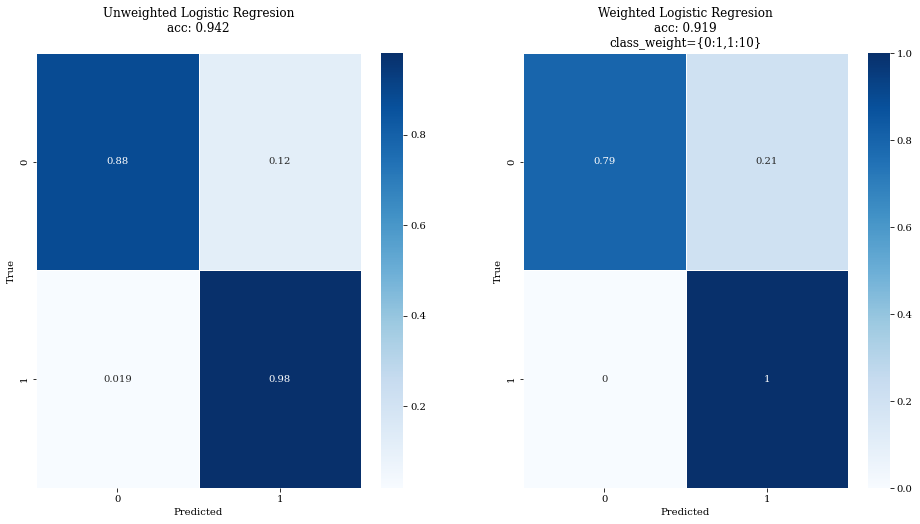

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plt.rcParams['font.family']='serif'

cm_no_weights = confusion_matrix(y_test, no_weights_predictions, normalize='true')

sns.heatmap(cm_no_weights, annot=True, cmap='Blues', linewidths=.5, ax=axs[0])
unweighted_title = 'Unweighted Logistic Regresion\nacc: '+str(round(unweighted_acc,3))+'\n'
axs[0].set(xlabel='Predicted', ylabel='True', title=unweighted_title) # FIX?!?

cm_weighted = confusion_matrix(y_test, weighted_predictions, normalize='true')
sns.heatmap(cm_weighted, annot=True, cmap='Blues', linewidths=.5, ax=axs[1])

weighted_title = 'Weighted Logistic Regresion\nacc: '+str(round(weighted_acc,3))+'\nclass_weight={0:1,1:10}'
axs[1].set(xlabel='Predicted', ylabel='True', title=weighted_title)
plt.show()